In [1]:
# univariate cnn lstm example
import numpy as np
import pandas as pd
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.layers import Conv1D
from tensorflow.layers import MaxPooling1D
import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow.layers'

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# Dada una secuencia de Entrada
data= pd.read_csv('EURUSD1.csv', 
                  sep=',', 
                  names=["time", "Open", "Max", "Min", "Close", "Volumen"])

In [4]:
raw_seq= pd.Series((data['Max'] - data['Max'].mean())/ (data['Max'].max() - data['Max'].min())).values
raw_seq=raw_seq[1:]-raw_seq[:-1]

In [5]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
n_features = 1

In [6]:
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
X_train=X[0:-1000]
y_train=y[0:-1000]
X_test=X[-1000:]
y_test=y[-1000:]

In [7]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [8]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='sigmoid', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

W1012 22:30:27.925275  8716 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.fit(X_train, y_train, epochs=1000, verbose=0)

W1012 22:30:28.289303  8716 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
y_trout = model.predict(X_train, verbose=0)

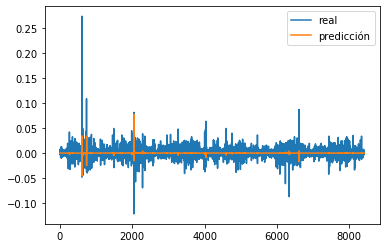

In [14]:
fig, ax = plt.subplots()
ax.plot(y_train[:,1], label='real')
ax.plot(y_trout[:,1],label='predicción')
ax.legend()
plt.show()

In [26]:
N=[]
vp=[]
vn=[]
fp=[]
fn=[]
for t in range (0,np.shape(y_trout[:,1])[0]-1):
    if ((np.sign([y_train[t+1,1][0]-y_train[t,1][0]])*np.sign([y_trout[t+1,1][0]-y_train[t,1][0]]))>0 )& (np.sign([y_trout[t+1,1][0]-y_train[t,1][0]])>0) :
        vp.append(1)
        N.append(1)
    elif ((np.sign([y_train[t+1,1][0]-y_train[t,1][0]])*np.sign([y_trout[t+1,1][0]-y_train[t,1][0]]))>0 )& (np.sign([y_trout[t+1,1][0]-y_train[t,1][0]]) <0):
        vn.append(1)
        N.append(1)
    elif ((np.sign([y_train[t+1,1][0]-y_train[t,1][0]])*np.sign([y_trout[t+1,1][0]-y_train[t,1][0]]))<0 )& (np.sign([y_trout[t+1,1][0]-y_train[t,1][0]]) <0):
        fn.append(1)
        N.append(1)
    elif ((np.sign([y_train[t+1,1][0]-y_train[t,1][0]])*np.sign([y_trout[t+1,1][0]-y_train[t,1][0]]))<0 )& (np.sign([y_trout[t+1,1][0]-y_train[t,1][0]])> 0):
        fp.append(1)
        N.append(1)
MDA=1/sum(N)*(sum(vp)+sum(vn))
recall_1= sum(vp)/(sum(vp)+sum(fn))
recall_2= sum(vn)/(sum(vn)+sum(fp))
MDA
print('MDA: '+str(MDA),'Recall tipo 1:'+str(recall_1), 'Recall tipo 2: '+str(recall_2))

MDA: 0.7356898238747553 Recall tipo 1:0.7098703888334995 Recall tipo 2: 0.760566762728146


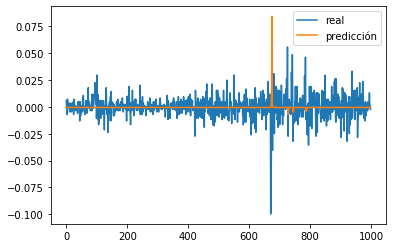

In [27]:
# testeo
y_tout = model.predict(X_test, verbose=0)
np.shape(y_test[:,1])

fig, ax = plt.subplots()
ax.plot(y_test[:,1], label='real')
ax.plot(y_tout[:,1],label='predicción')
ax.legend()
|plt.show()

In [29]:
N=[]
vp=[]
vn=[]
fp=[]
fn=[]
for t in range (0,np.shape(y_tout[:,1])[0]-1):
    if ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))>0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]])>0) :
        vp.append(1)
        N.append(1)
    elif ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))>0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]) <0):
        vn.append(1)
        N.append(1)
    elif ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))<0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]) <0):
        fn.append(1)
        N.append(1)
    elif ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))<0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]])> 0):
        fp.append(1)
        N.append(1)
MDA=1/sum(N)*(sum(vp)+sum(vn))
recall_1= sum(vp)/(sum(vp)+sum(fn))
recall_2= sum(vn)/(sum(vn)+sum(fp))
MDA
print('MDA: '+str(MDA),'Recall tipo 1:'+str(recall_1), 'Recall tipo 2: '+str(recall_2))

MDA: 0.7242083758937692 Recall tipo 1:0.6915113871635611 Recall tipo 2: 0.7560483870967742


In [44]:
N=[]
vp=[]
vn=[]
fp=[]
fn=[]
for t in range (0,np.shape(y_tout[:,1])[0]-1):
    if ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))>0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]])>0) & (abs(y_tout[t+1,1][0])>abs(y_tout.mean()*3)):
        vp.append(1)
        N.append(1)
    elif ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))>0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]) <0) & (abs(y_tout[t+1,1][0])>abs(y_tout.mean()*3)):
        vn.append(1)
        N.append(1)
    elif ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))<0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]) <0) & (abs(y_tout[t+1,1][0])>abs(y_tout.mean()*3)) :
        fn.append(1)
        N.append(1)
    elif ((np.sign([y_test[t+1,1][0]-y_test[t,1][0]])*np.sign([y_tout[t+1,1][0]-y_test[t,1][0]]))<0 )& (np.sign([y_tout[t+1,1][0]-y_test[t,1][0]])> 0)& (abs(y_tout[t+1,1][0])>abs(y_tout.mean()*3) ):
        fp.append(1)
        N.append(1)
MDA=1/sum(N)*(sum(vp)+sum(vn))
recall_1= sum(vp)/(sum(vp)+sum(fn))
recall_2= sum(vn)/(sum(vn)+sum(fp))
MDA
print('MDA: '+str(MDA),'Recall tipo 1:'+str(recall_1), 'Recall tipo 2: '+str(recall_2))

MDA: 0.75 Recall tipo 1:1.0 Recall tipo 2: 0.4


In [51]:
vn

[1, 1]

In [52]:
fp

[1, 1, 1]

In [53]:
vp

[1, 1, 1, 1, 1, 1, 1]

In [54]:
fn

[]

In [ ]:
67